<a href="https://colab.research.google.com/github/Lightning51B/Caltech-AI-ML/blob/main/deep_nn_sequential_vs_functinal_api.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

About the dataset:
- We'll be using the Fashion MNIST dataset (closthing classification)
- This is a more challenging problem compared to the classic MNIST
- It's comprised of 60K small 28x28 grayscale images for items of 10 types of clothing:
    - 0: T-shirt/top
    - 1: Trouser
    - 2: Pullover
    - 3: Dress
    - 4: Coat
    - 5: Sandal
    - 6: Shirt
    - 7: Sneaker
    - 8: Bag
    - 9: Ankle boot

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#deep learning libraries
from tensorflow.keras import layers, models
from tensorflow.keras import optimizers

#data
from tensorflow.keras.datasets import fashion_mnist

Loading the data

In [ ]:
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

#normalization
X_train, X_test = X_train/255.0, X_test/255.0

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
print(f'train data shape: {X_train.shape}')
print(f'test data shape: {X_test.shape}')
print(f'number of classes: {len(np.unique(y_test))}')

train data shape: (60000, 28, 28)
test data shape: (10000, 28, 28)
number of classes: 10


In [ ]:
clothing_ref = {0: 'T-shirt/top'
                ,1: 'Trouser'
                ,2: 'Pullover'
                ,3: 'Dress'
                ,4: 'Coat'
                ,5: 'Sandal'
                ,6: 'Shirt'
                ,7: 'Sneaker'
                ,8: 'Bag'
                ,9: 'Ankle boot'}


In [ ]:
train_label = pd.DataFrame(y_train, columns=['label'])

train_label

,label
0,9
1,0
2,0
3,3
4,0
...,...
59995,5
59996,1
59997,3
59998,0


In [ ]:
train_label['clothing_name'] = train_label['label'].map(clothing_ref)
train_label.head()

,label,clothing_name
0,9,Ankle boot
1,0,T-shirt/top
2,0,T-shirt/top
3,3,Dress
4,0,T-shirt/top


Build a 5x5 grid for clothing and their labels

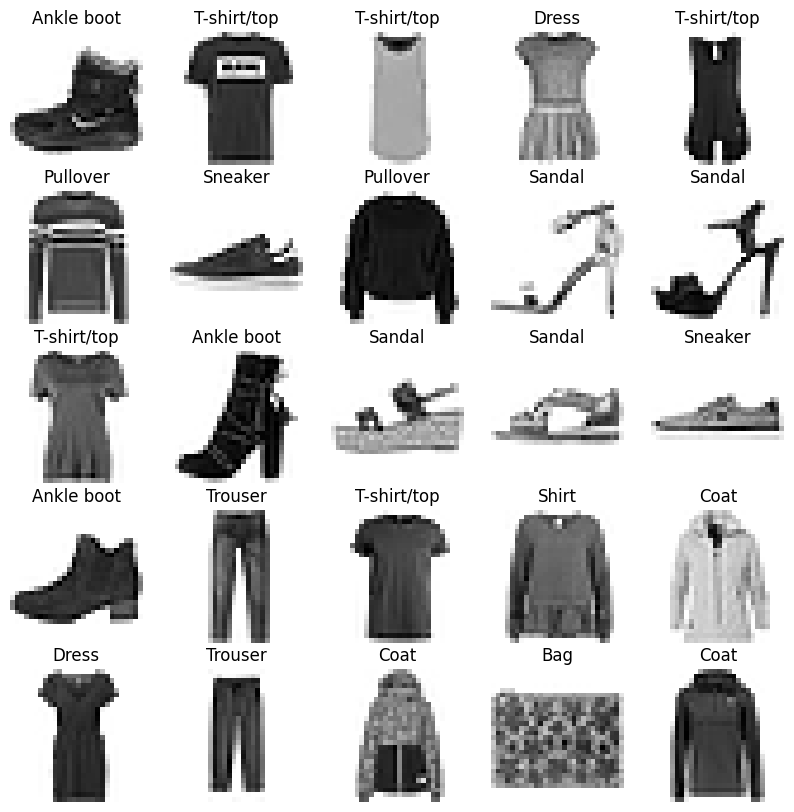

In [ ]:
plt.figure(figsize=(10,10))

for img in range(25):
  plt.subplot(5, 5, img+1)
  plt.imshow(-X_train[img], cmap='gray')
  plt.title(train_label['clothing_name'][img])
  plt.axis('off')


(array([6000., 6000., 6000., 6000., 6000., 6000., 6000., 6000., 6000.,
        6000.]),
 array([0. , 0.9, 1.8, 2.7, 3.6, 4.5, 5.4, 6.3, 7.2, 8.1, 9. ]),
 <BarContainer object of 10 artists>)

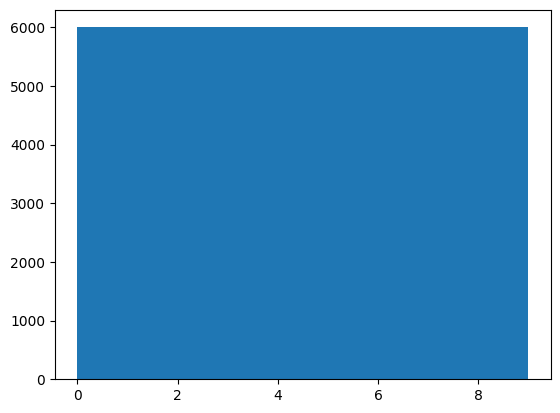

In [ ]:
plt.hist(y_train)

All classes are balanced

## Building The Neural Network Using Different Techniques

### Style 1-A: **Sequential** with Listed Components

Input, 2 Hidden Layers, Output

In [ ]:
nn_model = models.Sequential(
    [
        layers.Input(shape=(28,28)),
        layers.Flatten(),
        layers.Dense(80, activation='relu', name='hidden_layer_1'),
        layers.Dense(160, activation='relu', name='hidden_layer_2'),
        layers.Dense(10, activation='softmax', name='output_layer')
     ]

)

In [ ]:
nn_model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten (Flatten)                    │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ hidden_layer_1 (Dense)               │ (None, 80)                  │          62,800 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ hidden_layer_2 (Dense)               │ (None, 160)                 │          12,960 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ output_layer (Dense)                 │ (None, 10)                  │           1,610 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 77,370 (302.23 KB)

 Trainable params: 77,370 (302.23 KB)

 Non-trainable params: 0 (0.00 B)

### Style 1-B: **Sequential** with Appended Components in The List

In [ ]:
# build a blank sequential object
nn_model = models.Sequential()

# add components to it one-by-one
nn_model.add(layers.Input(shape=(28,28)))
nn_model.add(layers.Dense(80, activation='relu', name='hidden_layer_1'))
nn_model.add(layers.Dense(160, activation='relu', name='hidden_layer_2'))
nn_model.add(layers.Dense(10, activation='softmax', name='output_layer'))


> The benefit of Style 1-B is modularity and automation. Example:

In [ ]:
#suppose we have a metric to measure data complexity
complexity_score = 8

# build a blank sequential object
nn_model = models.Sequential()

# add components to it one-by-one
nn_model.add(layers.Input(shape=(28,28)))
nn_model.add(layers.Dense(80, activation='relu', name='hidden_layer_1'))

if complexity_score > 5:
  nn_model.add(layers.Dense(300, activation='relu', name='hidden_layer_2'))
  nn_model.add(layers.Dense(450, activation='relu', name='hidden_layer_3'))
else:
  nn_model.add(layers.Dense(160, activation='relu', name='hidden_layer_2'))


nn_model.add(layers.Dense(10, activation='softmax', name='output_layer'))


### Style B: Functional API

In [ ]:
#input layer
my_inputs = layers.Input(shape=(28,28))

#flattening
fl = (layers.Flatten())(my_inputs)

#hidden layers
h1 = (layers.Dense(80, activation='relu', name='hidden_layer_1'))(fl)
h2 = (layers.Dense(160, activation='relu', name='hidden_layer_2'))(h1)

#output
my_outputs = (layers.Dense(10, activation='softmax', name='output_layer'))(h2)


#integrate everything together
nn_model = models.Model(inputs=my_inputs, outputs=my_outputs)

In [ ]:
nn_model.summary()

Model: "functional_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_4 (InputLayer)           │ (None, 28, 28)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ hidden_layer_1 (Dense)               │ (None, 80)                  │          62,800 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ hidden_layer_2 (Dense)               │ (None, 160)                 │          12,960 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ output_layer (Dense)                 │ (None, 10)                  │           1,610 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 77,370 (302.23 KB)

 Trainable params: 77,370 (302.23 KB)

 Non-trainable params: 0 (0.00 B)

### Compile The Model

In [ ]:
loss_fn = 'sparse_categorical_crossentropy'
#using Adam as a function to customize its parameters
opt_algo = optimizers.Adam(learning_rate=0.001)

![LR](https://www.jeremyjordan.me/content/images/2018/02/Screen-Shot-2018-02-24-at-11.47.09-AM.png)

In [ ]:
nn_model.compile(optimizer=opt_algo,loss=loss_fn, metrics=['accuracy'])

In [ ]:
model_history = nn_model.fit(X_train, y_train, epochs=14, validation_split=.2, batch_size=24)

Epoch 1/14
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.7731 - loss: 0.6354 - val_accuracy: 0.8359 - val_loss: 0.4521
Epoch 2/14
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.8546 - loss: 0.3949 - val_accuracy: 0.8657 - val_loss: 0.3693
Epoch 3/14
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.8725 - loss: 0.3424 - val_accuracy: 0.8565 - val_loss: 0.3954
Epoch 4/14
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.8845 - loss: 0.3130 - val_accuracy: 0.8822 - val_loss: 0.3207
Epoch 5/14
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.8910 - loss: 0.2979 - val_accuracy: 0.8783 - val_loss: 0.3426
Epoch 6/14
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.8941 - loss: 0.2804 - val_accuracy: 0.8755 - val_loss: 0.3382
Epoch 7/14
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.9020 - loss: 0.2627 - val_accuracy: 0.8650 - val_loss: 0.3787
Epoch 8/14
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9028 - loss: 0.2563 

**Homework** finish this exercise with different techniques of evaluation